# 第10章: ベクトル空間法 (II)

第10章では，前章に引き続き単語ベクトルの学習に取り組む．

In [1]:
from gensim.models import Word2Vec

# 90. word2vecによる学習
81で作成したコーパスに対してword2vecを適用し，単語ベクトルを学習せよ．さらに，学習した単語ベクトルの形式を変換し，86-89のプログラムを動かせ．

In [2]:
# https://rare-technologies.com/word2vec-tutorial/
with open('81.txt', 'r') as f:
    corpus = [f.read().split()]
model = Word2Vec(corpus, min_count=1)    

In [3]:
# 86 ベクトル表示
model['United_States']

array([ -4.55889851e-03,  -4.42450074e-03,   2.43518036e-03,
        -4.17115539e-03,   1.25939795e-03,   3.59229208e-03,
        -5.46790008e-03,   9.52292059e-04,  -4.90826555e-03,
        -5.10424725e-04,  -4.70571639e-03,   2.95236008e-03,
         4.31544287e-03,  -1.49737415e-03,   1.76240341e-03,
        -3.58441815e-04,  -3.73578235e-03,  -2.61281827e-03,
         1.86443620e-03,   1.79130584e-03,   3.97921773e-03,
         1.86656835e-04,   4.24499344e-03,   2.68742302e-03,
         3.98504781e-03,   8.98310798e-04,  -4.30787355e-03,
         1.39969657e-03,  -1.74856593e-03,  -4.29119775e-03,
         2.49110302e-03,  -2.22166814e-03,  -2.41870992e-03,
         9.57286218e-04,  -3.39245798e-06,  -1.66968233e-03,
         1.70896284e-03,   4.20635147e-03,   3.48822982e-03,
        -1.23164675e-03,  -3.41445883e-03,   4.10517678e-03,
         2.52087810e-03,  -1.68692775e-03,  -7.44735764e-04,
         2.07334035e-03,  -4.81263327e-04,   1.40352419e-03,
        -2.26356601e-03,

In [4]:
# 87 コサイン類似度 
model.similarity("United_States", "U.S")

-0.044317797458117217

In [5]:
# 88 類似度 top10
model.most_similar(positive=['England'], topn=10)

[('transparent', 0.4819882810115814),
 ('NASDAQ', 0.4261570870876312),
 ('entirety.', 0.424990177154541),
 ('caper', 0.4225158393383026),
 ('Itabashi', 0.4191665053367615),
 ('bit,', 0.41398900747299194),
 ('isomorphous', 0.41125673055648804),
 ('Vovousa', 0.4019022583961487),
 ('1983-1985', 0.39843958616256714),
 ('Berntsen', 0.39584070444107056)]

In [6]:
# 89 アナロジー top10
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[('ROM-based', 0.46713748574256897),
 ('Bertiniani"', 0.4285348653793335),
 ('Grubs', 0.4275130033493042),
 ('kleinen', 0.42333662509918213),
 ('Plantagenet', 0.4016854763031006),
 ('Goupil', 0.39575374126434326),
 ('“forcibly', 0.38889238238334656),
 ('sexual', 0.38826602697372437),
 ('verciert', 0.3876068592071533),
 ('prewashed', 0.3871941864490509)]

# 91. アナロジーデータの準備
単語アナロジーの評価データをダウンロードせよ．このデータ中で": "で始まる行はセクション名を表す．例えば，": capital-common-countries"という行は，"capital-common-countries"というセクションの開始を表している．ダウンロードした評価データの中で，"family"というセクションに含まれる評価事例を抜き出してファイルに保存せよ．

In [7]:
with open('questions-words.txt', 'r') as f:
    sections = f.read().split(':')
    for section in sections:
        if 'family' in section.split('\n')[0]:
            family = "\n".join(section.split('\n')[1:])
with open('family.txt', 'w') as f:
    f.write(family)

# 92. アナロジーデータへの適用
91で作成した評価データの各事例に対して，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．このプログラムを85で作成した単語ベクトル，90で作成した単語ベクトルに対して適用せよ．

In [8]:
with open('family.txt', 'r') as f:
    family = [x[:-1].split() for x in f.readlines()]
len(family)

506

In [9]:
def check_contain(words):
    for w in words:
        if not w in model:
            return False 
    return True

In [10]:
with open('92.txt', 'w') as f:
    for line in family:
        c1, c2, c3, c4 = line
        nomatch = model.doesnt_match(line)
        if check_contain(line):
            w, p = model.most_similar(positive=[c2, c3], negative=[c1], topn=1)[0]
            line = str(w) + "\t" + str(p) + "\n"
        else:
            line = "NoMatch\n"
        f.write(line)

# 93. アナロジータスクの正解率の計算
92で作ったデータを用い，各モデルのアナロジータスクの正解率を求めよ．

In [11]:
count93 = 0
with open('92.txt', 'r') as f:
    for i, line in enumerate(f.readlines()):
        w = line[:-1].split()[0]
        ans_w = family[i][3]
        if w != "NoMatch" and w == ans_w:
            count93 += 1
            print("match!!!!!")
count93 / len(family)

0.0

# 94. WordSimilarity-353での類似度計算
The WordSimilarity-353 Test Collectionの評価データを入力とし，1列目と2列目の単語の類似度を計算し，各行の末尾に類似度の値を追加するプログラムを作成せよ．このプログラムを85で作成した単語ベクトル，90で作成した単語ベクトルに対して適用せよ．

In [64]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
class W2V:
    def __init__(self):
        with open('Xpca.csv', 'r') as f:
            self.Xpca = np.array([np.array(line[:-1].split(','), dtype=np.float64) for line in f.readlines()])
        with open('dictionary.txt', 'r') as f:
            self.dictionary = np.array([x[:-1] for x in f.readlines()])

    def vec(self, word):
        dictionary = self.dictionary
        i = np.where(dictionary == word)[0][0]
        return self.Xpca[i].reshape(1, -1)

    def get_word_cs(self, word1, word2):
        return cosine_similarity(self.vec(word1), self.vec(word2))[0][0]
    
    def get_top10_w(self, word):
        lst=[]
        for i, w in enumerate(self.Xpca[:1000]):
            cs = cosine_similarity(self.vec(word), w.reshape(1, -1))[0][0]
            lst.append((self.dictionary[i], cs))
        return pd.DataFrame(lst).sort_values(1, ascending=False).head(10)
    
    def get_top10_v(self, vec):
        lst=[]
        for i, w in enumerate(self.Xpca[:1000]):
            cs = cosine_similarity(vec, w.reshape(1, -1))
            lst.append((self.dictionary[i], cs[0][0]))
        df = pd.DataFrame(lst)
        return df.sort_values(1, ascending=False).head(10)

In [65]:
w2v = W2V()

In [66]:
w2v.vec('Canada')

array([[  2.27285695e-02,  -1.59208592e-02,  -3.31550343e-02,
          2.03010215e-02,  -9.41559790e-03,   7.97741673e-04,
          1.55274177e-01,  -9.50570057e-02,   2.26153285e-03,
          4.80850340e-03,  -2.58132911e-02,   6.13834541e-02,
         -2.26287094e-02,   1.03193454e-02,  -3.02973896e-01,
         -1.09481356e-01,  -1.45151164e-02,   1.25310122e-01,
          1.40209178e-01,   3.19698204e-01,   9.56174735e-02,
         -1.50355487e-01,   1.95894886e-02,  -3.03469660e-02,
          1.01547830e-01,   1.60578003e-02,  -1.15604034e-01,
         -3.25937177e-02,   5.78453428e-02,  -1.41559113e-01,
         -1.00749227e-03,  -5.03765155e-03,   7.04721068e-02,
          3.11861660e-02,   1.46851224e-02,   5.47500564e-02,
         -3.73342286e-02,  -1.68402723e-01,  -1.00442080e-03,
          7.21661017e-02,   4.57191734e-02,   1.70151228e-02,
         -7.51159765e-03,  -4.42333082e-02,  -7.32333992e-02,
         -1.27014543e-02,   1.49935530e-03,   1.13569212e-02,
        

In [67]:
w2v.get_word_cs("United_States", "U.S")

0.018007739417290149

In [19]:
with open('combined.csv', 'r') as f:
    combined = f.readlines()[1:]
with open('94.csv', 'w') as f:
     for line in combined:
            w1, w2, p = line.split(',')
            if w1 in w2v.dictionary and w2 in w2v.dictionary:
                s85 = w2v.get_word_cs(w1, w2)
            else:
                s85 = 0
            if check_contain([w1, w2]):
                s90 = model.similarity(w1, w2)
            else:
                s90 = 0
            l = line[:-1] + ',' + str(s85) + ',' + str(s90) + '\n'
            f.write(l)

# 95. WordSimilarity-353での評価
94で作ったデータを用い，各モデルが出力する類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [25]:
df94 = pd.read_csv("94.csv", header=None)
ws = df94[2]
test85 = df94[3]
test90 = df94[4]

In [26]:
from scipy.stats import spearmanr
spearmanr(ws, test85)

SpearmanrResult(correlation=0.022997915367060504, pvalue=0.66674761087856471)

In [27]:
spearmanr(ws, test90)

SpearmanrResult(correlation=-0.052020204404379926, pvalue=0.32977642815077535)

# 96. 国名に関するベクトルの抽出
word2vecの学習結果から，国名に関するベクトルのみを抜き出せ．

In [70]:
with open('country.txt', 'r') as f:
    country = [c[:-1] for c in f.readlines()]
country_key = []
country_val = []
for c in country:
    if c in w2v.dictionary:
        country_key.append(c)
        country_val.append(w2v.vec(c)[0])

In [71]:
country_val[country_key.index('Canada')]

array([  2.27285695e-02,  -1.59208592e-02,  -3.31550343e-02,
         2.03010215e-02,  -9.41559790e-03,   7.97741673e-04,
         1.55274177e-01,  -9.50570057e-02,   2.26153285e-03,
         4.80850340e-03,  -2.58132911e-02,   6.13834541e-02,
        -2.26287094e-02,   1.03193454e-02,  -3.02973896e-01,
        -1.09481356e-01,  -1.45151164e-02,   1.25310122e-01,
         1.40209178e-01,   3.19698204e-01,   9.56174735e-02,
        -1.50355487e-01,   1.95894886e-02,  -3.03469660e-02,
         1.01547830e-01,   1.60578003e-02,  -1.15604034e-01,
        -3.25937177e-02,   5.78453428e-02,  -1.41559113e-01,
        -1.00749227e-03,  -5.03765155e-03,   7.04721068e-02,
         3.11861660e-02,   1.46851224e-02,   5.47500564e-02,
        -3.73342286e-02,  -1.68402723e-01,  -1.00442080e-03,
         7.21661017e-02,   4.57191734e-02,   1.70151228e-02,
        -7.51159765e-03,  -4.42333082e-02,  -7.32333992e-02,
        -1.27014543e-02,   1.49935530e-03,   1.13569212e-02,
        -1.53635488e-02,

# 97. k-meansクラスタリング
96の単語ベクトルに対して，k-meansクラスタリングをクラスタ数$k=5$として実行せよ．

In [72]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(country_val)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

# 98. Ward法によるクラスタリング
96の単語ベクトルに対して，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

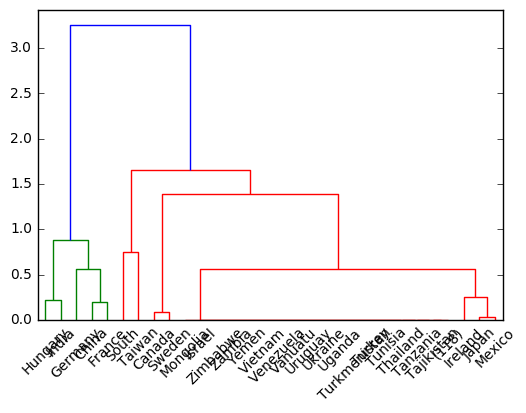

In [93]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline

result = linkage(country_val, method='ward')
dendrogram(result, truncate_mode='lastp', labels=country_key)
plt.show()

# 99. t-SNEによる可視化
96の単語ベクトルに対して，ベクトル空間をt-SNEで可視化せよ．

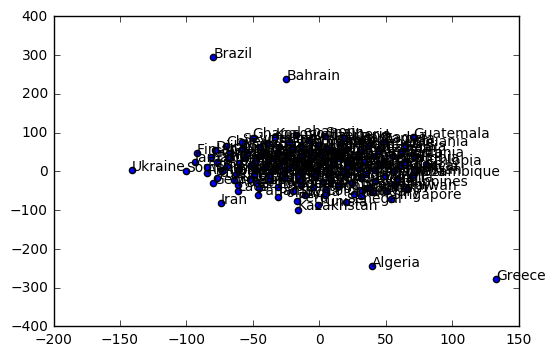

In [96]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(country_val)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
for i, w in enumerate(country_key):
    plt.annotate(w, (X_tsne[i, 0], X_tsne[i, 1]))